In [4]:
import os

import cfGPR

import numpy as np
import astropy.units as u
import astropy.constants as c
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
exposures = np.arange(487, 500)

/home/austinfortino/DESworkspace/cfGPR.py:1051: RuntimeWarning: invalid value encountered in true_divide
  sumxw = np.where( sumw > minWeight, sumxw / sumw, noData)
/home/austinfortino/DESworkspace/cfGPR.py:1052: RuntimeWarning: invalid value encountered in true_divide
  sumyw = np.where( sumw > minWeight, sumyw / sumw, noData)
/home/austinfortino/DESworkspace/cfGPR.py:1053: RuntimeWarning: divide by zero encountered in true_divide
  sumw = np.where( sumw > minWeight, 1./sumw, noData)
/home/austinfortino/DESworkspace/cfGPR.py:1054: RuntimeWarning: invalid value encountered in greater
  rmsx = np.std(sumxw[sumw>0.])
/home/austinfortino/DESworkspace/cfGPR.py:1055: RuntimeWarning: invalid value encountered in greater
  rmsy = np.std(sumyw[sumw>0.])
/home/austinfortino/DESworkspace/cfGPR.py:1056: RuntimeWarning: invalid value encountered in greater
  print('RMSx, RMSy, noise:', rmsx, rmsy, np.sqrt(np.mean(sumw[sumw>0.])))
/home/austinfortino/DESworkspace/cfGPR.py:1064: RuntimeWarning: inva

RMSx, RMSy, noise: 15.487817121245486 13.697130742784088 1.846141664789785


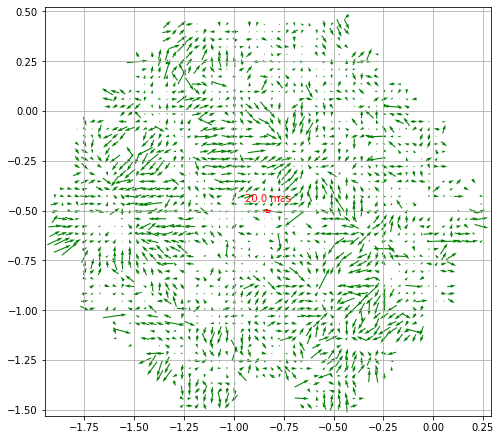

/home/austinfortino/DESworkspace/cfGPR.py:1051: RuntimeWarning: invalid value encountered in true_divide
  sumxw = np.where( sumw > minWeight, sumxw / sumw, noData)
/home/austinfortino/DESworkspace/cfGPR.py:1052: RuntimeWarning: invalid value encountered in true_divide
  sumyw = np.where( sumw > minWeight, sumyw / sumw, noData)
/home/austinfortino/DESworkspace/cfGPR.py:1053: RuntimeWarning: divide by zero encountered in true_divide
  sumw = np.where( sumw > minWeight, 1./sumw, noData)
/home/austinfortino/DESworkspace/cfGPR.py:1054: RuntimeWarning: invalid value encountered in greater
  rmsx = np.std(sumxw[sumw>0.])
/home/austinfortino/DESworkspace/cfGPR.py:1055: RuntimeWarning: invalid value encountered in greater
  rmsy = np.std(sumyw[sumw>0.])
/home/austinfortino/DESworkspace/cfGPR.py:1056: RuntimeWarning: invalid value encountered in greater
  print('RMSx, RMSy, noise:', rmsx, rmsy, np.sqrt(np.mean(sumw[sumw>0.])))
/home/austinfortino/DESworkspace/cfGPR.py:1064: RuntimeWarning: inva

RMSx, RMSy, noise: 10.969312966102898 8.875011051595248 1.846141664789785


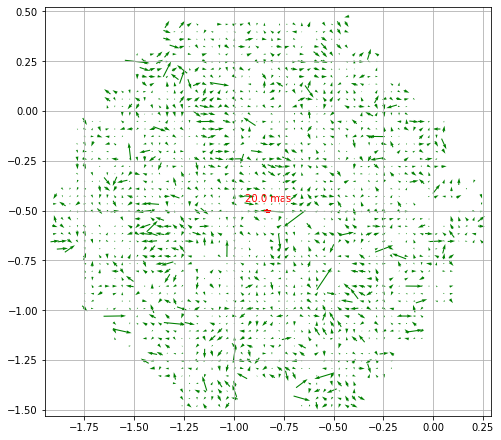

RMSx, RMSy, noise: 15.74675175593739 12.723851505295876 0.8137655259154588


/home/austinfortino/DESworkspace/cfGPR.py:1051: RuntimeWarning: invalid value encountered in true_divide
  sumxw = np.where( sumw > minWeight, sumxw / sumw, noData)
/home/austinfortino/DESworkspace/cfGPR.py:1052: RuntimeWarning: invalid value encountered in true_divide
  sumyw = np.where( sumw > minWeight, sumyw / sumw, noData)
/home/austinfortino/DESworkspace/cfGPR.py:1053: RuntimeWarning: divide by zero encountered in true_divide
  sumw = np.where( sumw > minWeight, 1./sumw, noData)
/home/austinfortino/DESworkspace/cfGPR.py:1054: RuntimeWarning: invalid value encountered in greater
  rmsx = np.std(sumxw[sumw>0.])
/home/austinfortino/DESworkspace/cfGPR.py:1055: RuntimeWarning: invalid value encountered in greater
  rmsy = np.std(sumyw[sumw>0.])
/home/austinfortino/DESworkspace/cfGPR.py:1056: RuntimeWarning: invalid value encountered in greater
  print('RMSx, RMSy, noise:', rmsx, rmsy, np.sqrt(np.mean(sumw[sumw>0.])))
/home/austinfortino/DESworkspace/cfGPR.py:1064: RuntimeWarning: inva

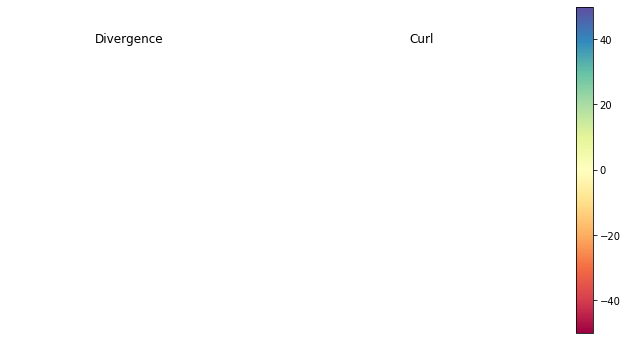

IndexError: cannot do a non-empty take from an empty axes.

In [3]:
for exposure in exposures:
    GP = cfGPR.CurlFreeGPR(f"../cfexposures/{exposure}", printing=False)
    GP.load_fits('hoid')
    GP.extract_data(exposure)
    GP.sigma_clip()
    GP.split_data(train_size=0.50, test_size=0.50)

    if (GP.nData < 6000) or (GP.nData > 25000):
        os.system(f"rm -r ../cfexposures/{exposure}")
        continue
    
    GP.correlation_fit()
    GP.optimize()
    GP.fit(GP.theta)
    GP.predict(GP.Xtest)
    GP.get_chisq(GP.Ytest, GP.fbar_s, GP.Etest)
    GP.wrap()